<a href="https://colab.research.google.com/github/ghazaletlbn/my-bachelor-project/blob/main/bachelor_project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
import scipy.sparse as sp
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.sparse.linalg import eigsh
from scipy.stats import pareto, expon, uniform, weibull_min
import math

Text(0.5, 1.0, 'RSRBG Graph')

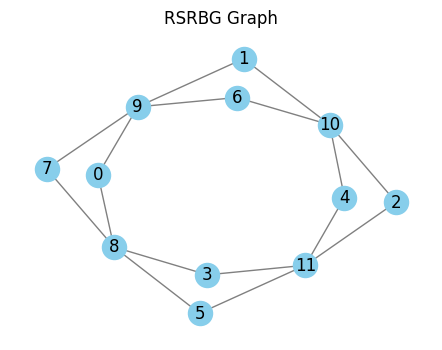

In [ ]:
def generate_semi_regular_bipartite_graph2(n,d1, d2):
    n1 = int((n * d2) / (d1 + d2))
    n2 = n - n1

    graph = nx.Graph()
    graph.add_nodes_from(list(range(n)))

    n1_stubs = list(range(n1)) * d1
    n2_stubs = list(range(n1, n)) * d2

    while len(n1_stubs) > 0:
        rnd1 = random.randint(0, len(n1_stubs) - 1)
        rnd2 = random.randint(0, len(n2_stubs) - 1)
        if graph.has_edge(n1_stubs[rnd1], n2_stubs[rnd2]):
            continue
        graph.add_edge(n1_stubs[rnd1], n2_stubs[rnd2])
        n1_stubs.pop(rnd1)
        n2_stubs.pop(rnd2)

        has_chance = False
        for s1 in n1_stubs:
            for s2 in n2_stubs:
                if not graph.has_edge(s1, s2):
                    has_chance = True
                    break
            if has_chance:
                break;

        if not has_chance:
            for i in range(len(n1_stubs)):
                for u, v in graph.edges:
                    n1_node = min([u, v])
                    n2_node = max([u, v])
                    if n1_node != n1_stubs[i] and n2_node != n2_stubs[i] and (not graph.has_edge(n1_node, n2_stubs[i])) and (not graph.has_edge(n1_stubs[i], n2_node)):
                      graph.remove_edge(u, v)
                      graph.add_edge(n1_node, n2_stubs[i])
                      graph.add_edge(n1_stubs[i], n2_node)
                      break
            break

    return graph

graph = generate_semi_regular_bipartite_graph2(12,2, 4)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
nx.draw(graph, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('RSRBG Graph')

Text(0.5, 1.0, 'RSRG Graph')

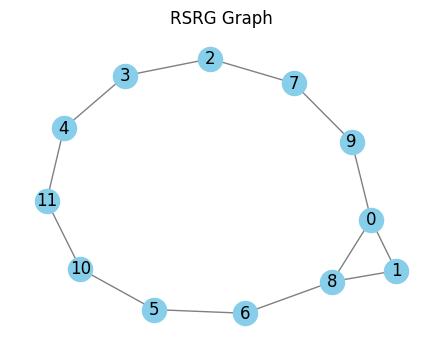

In [ ]:
def generate_semi_regular_graph(n,d1, d2, p):
    n1 = math.floor(n * (1 - p))
    n2 = n - n1
    n1_stubs = list(range(n1)) * d1
    n2_stubs = list(range(n1, n)) * d2
    stubs = n1_stubs + n2_stubs
    graph = nx.Graph()
    graph.add_nodes_from(list(range(n)))
    while len(stubs) > 1:
        if len(stubs) == 2:
            if random.random() <= p:
                if graph.has_edge(stubs[0], stubs[1]) or stubs[0] == stubs[1]:
                    for u, v in graph.edges:
                        if not any(i in [u, v] for i in [stubs[0], stubs[1]]):
                          if (not graph.has_edge(u, stubs[0])) and (not graph.has_edge(stubs[1], v)):
                            graph.add_edge(u, stubs[0])
                            graph.add_edge(v, node2)
                            break
                        elif (not graph.has_edge(v, stubs[0])) and (not graph.has_edge(stubs[1], u)):
                            graph.add_edge(v, stubs[0])
                            graph.add_edge(u, stubs[1])
                            break
                else:
                    graph.add_edge(stubs[0], stubs[1])
            break

        rnd = random.randint(0, len(stubs) - 1)
        node1 = stubs[rnd]
        stubs.pop(rnd)
        rnd = random.randint(0, len(stubs) - 1)
        node2 = stubs[rnd]
        stubs.pop(rnd)
        if random.random() <= p:
            if node1 == node2 or graph.has_edge(node1, node2):
               for u, v in graph.edges:
                    if not any(i in [u, v] for i in [node1, node2]):
                         if (not graph.has_edge(u, node1)) and (not graph.has_edge(node2, v)):
                            graph.add_edge(u, node1)
                            graph.add_edge(v, node2)
                            break
                    elif (not graph.has_edge(v, node1)) and (not graph.has_edge(node2, u)):
                            graph.add_edge(v, node1)
                            graph.add_edge(u, node2)
                            break

            else:
                graph.add_edge(node1, node2)
        else:
            continue
    return graph



plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
nx.draw(generate_semi_regular_graph(12,4,2,1), with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('RSRG Graph')